This notebook is used to add a column "cluster" and a column "grade" to the database using the doctor's classification system.

In [35]:
import yaml
import os
import pandas
import matplotlib
import numpy as np

os.chdir("PATH TO WORK DIR")

In [5]:
with open('head_traumas_classification.yml', 'r') as stream:
    try:
        yaml_data = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
        
traumabase_full = pandas.read_csv('data_preprocessed_ISS.csv')


In [6]:
def get_cluster(str_iss_sel) :
    """
    INPUT : 
    the list of traumas found on a patient separated with ", "
    
    OUTPUT : 
    the number of the cluster the patient belongs to
                0 : Lésion axonale diffuse
                1 : Lésion extra-axiale
                2 : Lésion intra-axiale
    """
    
    num_cluster = -1
    
    with open('head_traumas_classification.yml', 'r') as stream:
        try:
            yaml_data = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    
    lad = set(yaml_data['classes']['LÃ©sion axonale diffuse'])
    lea = set(yaml_data['classes']['LÃ©sion extra-axiale'])
    lia = set(yaml_data['classes']['LÃ©sion intra-axiale'])
    
    try : 
        set_iss_sel = set(str_iss_sel.split(", "))
    except :
        return -1 # This means the ISS/Selection is NaN
    
    # We take the intersection bewteen the set of lesions of the patient and each class of lesion
    has_lad = list(lad & set_iss_sel)
    has_lea = list(lea & set_iss_sel)
    has_lia = list(lia & set_iss_sel) 
    
    # int(x[-1:]) is the gravity of the lesion, the ternary is in case the set is empty
    lad_importance = max(map(lambda x : int(x[-1:]), has_lad)) if len(has_lad) > 0 else -1
    lea_importance = max(map(lambda x : int(x[-1:]), has_lea)) if len(has_lea) > 0 else -1
    lia_importance = max(map(lambda x : int(x[-1:]), has_lia)) if len(has_lia) > 0 else -1
    
    
    
    '''print(lad_importance)
    print(lea_importance)
    print(lia_importance)
    print((has_lad), (has_lea), (has_lia))'''
    

    if lad_importance == lea_importance == lia_importance == -1 :
        return -1 # This means the patient belongs to no class
    elif lad_importance == max([lad_importance, lea_importance, lia_importance]) :
        return 0
    elif lea_importance == max([lad_importance, lea_importance, lia_importance]) :
        return 1
    else :
        return 2
    
    return num_cluster

In [7]:
def get_grade(str_iss_sel) :
    """
    INPUT : 
    the list of traumas found on a patient separated with ", "
    
    OUTPUT : 
    the number of the cluster the patient belongs to
                0 : Low
                1 : High
    """
    
    num_cluster = -1
    
    with open('head_traumas_classification.yml', 'r') as stream:
        try:
            yaml_data = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    
    lad = set(yaml_data['grades']['Low'])
    lea = set(yaml_data['grades']['High'])
    
    try : 
        set_iss_sel = set(str_iss_sel.split(", "))
    except :
        # This means the ISS/Selection is NaN
        return -1
        
    has_lad = list(lad & set_iss_sel)
    has_lea = list(lea & set_iss_sel)
    
    lad_importance = max(map(lambda x : int(x[-1:]), has_lad)) if len(has_lad) > 0 else -1
    lea_importance = max(map(lambda x : int(x[-1:]), has_lea)) if len(has_lea) > 0 else -1
    
    
    
    '''print(lad_importance)
    print(lea_importance)
    print(lia_importance)

    print((has_lad), (has_lea), (has_lia))'''
    
    if lad_importance == lea_importance == -1 :
        return -1
    elif lad_importance == max([lad_importance, lea_importance]) :
        return 0
    elif lea_importance == max([lad_importance, lea_importance]) :
        return 1
    
    return num_cluster

In [8]:
traumabase_full['cluster'] = traumabase_full['ISS/Selection'].apply(get_cluster)

In [9]:
traumabase_full['grade'] = traumabase_full['ISS/Selection'].apply(get_grade)

In [10]:
len(traumabase_full)

8269

In [13]:
traumabase_full.to_csv('data_preprocessed_1.csv')

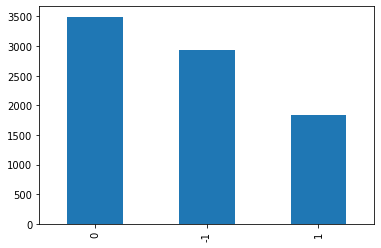

In [12]:
traumabase_full['grade'].value_counts().plot.bar()

In [24]:
traumabase_test = pandas.read_csv('data_preprocessed_1.csv')
try:
    traumabase_test = traumabase_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ISS/Selection'], axis=1)
except :
    pass

# We also want to drop Temperature.min since it is almost empty
try:
    traumabase_test = traumabase_test.drop(['Temperature.min'], axis=1)
except :
    pass


print(traumabase_test.columns)

traumabase_test.to_csv('data_preprocessed_2.csv')

Index(['Trauma.center', 'Anticoagulant.therapy', 'Antiplatelet.therapy',
       'GCS.init', 'GCS.motor.init', 'Pupil.anomaly.ph', 'Osmotherapy/Anomaly',
       'Cardiac.arrest.ph', 'SBP.ph', 'DBP.ph', 'HR.ph', 'SBP.ph.min',
       'DBP.ph.min', 'HR.ph.max', 'Cristalloid.volume', 'Colloid.volume',
       'HemoCue.init', 'Delta.hemoCue', 'Vasopressor.therapy', 'SpO2.ph.min',
       'Medcare.time.ph', 'GCS', 'GCS.motor', 'Pupil.anomaly', 'TCD.PI.max',
       'FiO2', 'Neurosurgery.day0', 'IGS.II', 'Tranexamic.acid', 'TBI',
       'Osmotherapy', 'IICP', 'EVD', 'Decompressive.craniectomy', 'Death',
       'AIS.head', 'AIS.face', 'AIS.external', 'ISS', 'Shock.index.ph',
       'Delta.shock.index', 'cluster', 'grade'],
      dtype='object')


In [15]:
len(traumabase_test.loc[((traumabase_test["grade"] == 0) & (traumabase_test["Tranexamic.acid"] == 1))])

282

In [45]:
pandas.set_option('display.expand_frame_repr', True)
pandas.option_context('display.max_rows', -1, 'display.max_columns', -1)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 40)

traumabase_test.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Trauma.center,Anticoagulant.therapy,Antiplatelet.therapy,GCS.init,GCS.motor.init,Pupil.anomaly.ph,Osmotherapy/Anomaly,Cardiac.arrest.ph,SBP.ph,DBP.ph,HR.ph,SBP.ph.min,DBP.ph.min,HR.ph.max,Cristalloid.volume,Colloid.volume,HemoCue.init,Delta.hemoCue,Vasopressor.therapy,SpO2.ph.min,Medcare.time.ph,GCS,GCS.motor,Pupil.anomaly,TCD.PI.max,FiO2,Neurosurgery.day0,IGS.II,Temperature.min,Tranexamic.acid,TBI,Osmotherapy,IICP,EVD,Decompressive.craniectomy,Death,AIS.head,AIS.face,AIS.external,ISS,Shock.index.ph,Delta.shock.index,cluster,grade
count,8269.000000,8269.000000,8269.000000,8269.000000,7915.000000,7907.000000,8103.000000,7639.000000,8107.000000,8269.000000,8078.000000,5845.000000,5823.000000,5828.000000,7203.000000,7180.000000,7123.000000,5788.000000,5682.000000,5371.000000,5180.000000,8269.000000,7299.000000,5917.00000,4790.000000,4705.000000,8130.000000,4029.000000,7710.000000,8269.000000,8099.000000,687.000000,8269.000000,8269.000000,8269.000000,8257.000000,8269.000000,8269.000000,8269.000000,8130.000000,8130.000000,8130.000000,8136.000000,5746.000000,5631.000000,8269.000000,8269.000000
mean,4134.000000,4134.000000,4135.000000,4.184424,0.053316,0.050335,10.612242,4.644849,1.776119,3.199782,0.060782,127.760308,76.216899,88.086822,106.349021,62.598050,93.747017,785.232205,53.511088,13.548010,0.319284,0.177047,94.555008,93.90147,12.675365,5.296493,1.711562,1.298635,0.589847,0.164470,36.495864,34.333770,0.082960,0.663926,0.960938,0.948892,0.059983,0.056113,0.199299,3.405412,0.593235,0.158672,23.501844,0.720116,-0.038936,0.101705,-0.131818
std,2387.199021,2387.199021,2387.199021,3.912748,0.224678,0.218649,4.681667,1.944284,0.707077,1.951949,0.238945,34.342323,21.854721,27.583314,38.557186,24.044684,31.879534,580.590654,206.805296,2.103408,2.201312,0.381731,10.279172,97.69156,3.951581,1.608557,0.631776,0.708514,0.316749,0.370724,22.090170,1.626958,0.275839,0.472393,0.461689,0.886923,0.237470,0.230154,0.399497,1.294583,0.955514,0.379917,14.363188,0.356933,0.420528,1.006718,0.748351
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.370000,0.000000,0.000000,0.00000,3.000000,1.000000,0.000000,0.300000,0.000000,0.000000,0.000000,27.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.220000,-1.000000,-1.000000
25%,2067.000000,2067.000000,2068.000000,1.000000,0.000000,0.000000,6.000000,4.000000,2.000000,3.000000,0.000000,112.000000,66.000000,72.000000,91.000000,51.000000,79.000000,500.000000,0.000000,12.400000,-1.000000,0.000000,94.000000,55.00000,13.000000,6.000000,2.000000,0.900000,0.300000,0.000000,18.000000,33.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,13.000000,0.535714,-0.150000,-1.000000,-1.000000
50%,4134.000000,4134.000000,4135.000000,3.000000,0.000000,0.000000,13.000000,6.000000,2.000000,3.000000,0.000000,130.000000,80.000000,88.000000,112.000000,67.000000,93.000000,500.000000,0.000000,14.000000,0.100000,0.000000,97.000000,78.00000,15.000000,6.000000,2.000000,1.100000,0.550000,0.000000,33.000000,34.500000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,22.000000,0.671429,-0.011236,0.000000,0.000000
75%,6201.000000,6201.000000,6202.000000,5.000000,0.000000,0.000000,15.000000,6.000000,2.000000,3.000000,0.000000,147.000000,90.000000,105.000000,130.000000,79.000000,110.000000,1000.000000,0.000000,15.000000,1.500000,0.000000,99.000000,110.00000,15.000000,6.000000,2.000000,1.400000,1.000000,0.000000,52.000000,35.400000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,29.000000,0.833333,0.108357,1.000000,0.000000
max,8268.000000,8268.000000,8269.000000,21.000000,1.000000,1.000000,15.000000,6.000000,3.000000,13.000000,1.000000,256.000000,170.000000,200.000000,22